# Phase 2 - Milestones 1

## i. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Name : Muhammad Irham Dinan
- Batch : FTDS-012
- Dataset : `https://www.kaggle.com/datasets/blastchar/telco-customer-churn`
- Objective : "Predict behavior to retain customers using Artificial Neural Network."

## ii. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from imblearn.over_sampling import SMOTENC
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Functional, clone_model
from keras.layers import Dropout, Dense, BatchNormalization, Input, concatenate
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers, initializers, Model
from keras.utils import plot_model

## iii. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load dataset .csv ke into 'data'

path = 'telco_customer_churn.csv'
data = pd.read_csv(path)

In [4]:
# Preview dataset .head()

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Preview dataset .tail()

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# Duplicate dataset into data_original

data_original = data.copy()

In [7]:
# Check overview information of dataset .info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that there is no null-value (missing value) in dataset.

In [8]:
# Drop unnecessary column

drop_id = ['customerID']
data.drop(drop_id, axis=1, inplace=True)

In [9]:
# Rename target's column & value name

data.rename(columns={'Churn':'Is_Churned'}, inplace=True)
data['Is_Churned'] = data.Is_Churned.map({'Yes':1, 'No':0})

In [10]:
# Change dtype 'TotalCharges' into numeric

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [11]:
# Change dtype 'TotalCharges' into numeric

data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')
data['SeniorCitizen'] = data.SeniorCitizen.map({1:'Yes', 0:'No'})

In [12]:
# Check overview information of dataset .info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [13]:
# Check descriptive statistics of dataset .describe()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Is_Churned,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


## iv. Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

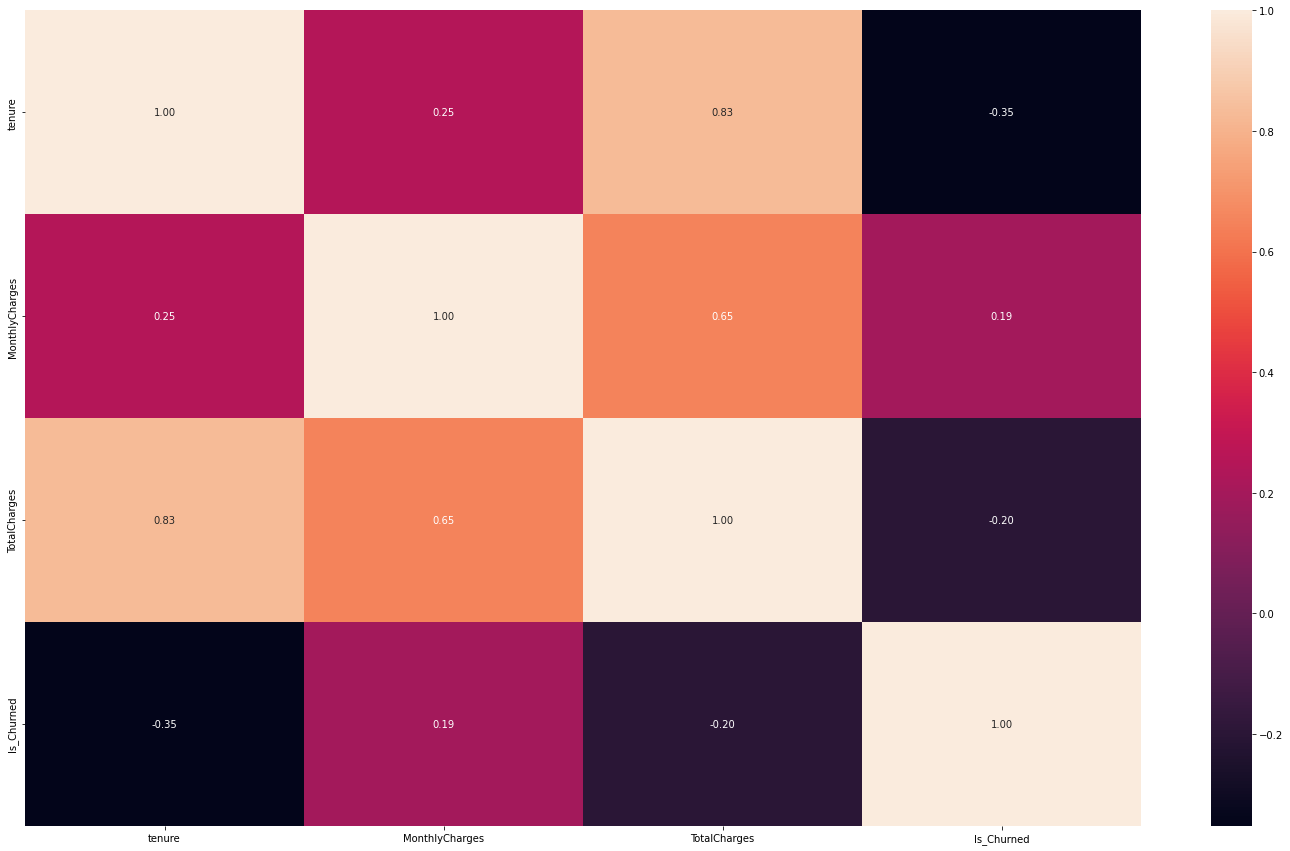

In [14]:
# Create visualization of Heatmap of numerical data

plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()


Based on heatmap correlation above between numerical columns to target, it can be seen that those features represented as `tenure`, `MonthlyCharges`, and `TotalCharges` have adequate correlation values to target `Is_Churned` from ±0,19 to ±0,35.

While, categorical columns shall be evaluated theirs correlations to target by different approaches, preferably using countplot visualization and their unique characteristics.

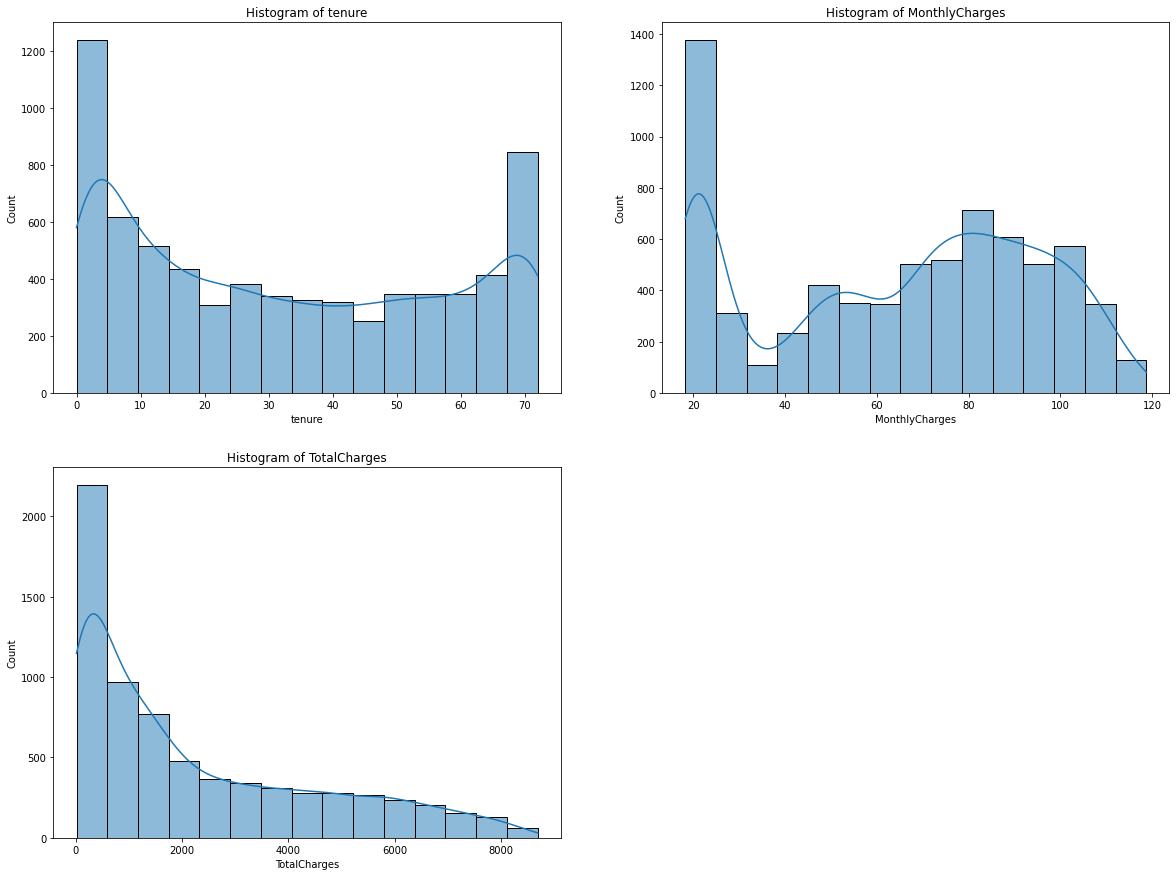

In [15]:
# Membuat visualisasi sebaran data pada kelompok kolom usia funding dan kolom usia milestone

plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.histplot(data['tenure'], bins=15, kde=True)
plt.title('Histogram of tenure')

plt.subplot(2, 2, 2)
sns.histplot(data['MonthlyCharges'], bins=15, kde=True)
plt.title('Histogram of MonthlyCharges')

plt.subplot(2, 2, 3)
sns.histplot(data['TotalCharges'], bins=15, kde=True)
plt.title('Histogram of TotalCharges')

plt.show()

In [16]:
# Check skewness value of numerical data's distribution

print('Skewness value of Tenure \t\t:{:.3f}'.format(data.tenure.skew()))
print('Skewness value of Monthly Charges \t:{:.3f}'.format(data.MonthlyCharges.skew()))
print('Skewness value of Total Charges \t:{:.3f}'.format(data.TotalCharges.skew()))

Skewness value of Tenure 		:0.240
Skewness value of Monthly Charges 	:-0.221
Skewness value of Total Charges 	:0.962


Based on histogram graphs above, it can be seen that most of `tenure`'s numbers are dominantly in 0-5 times and around 70 times with at least 800 total nos. Both `MonthlyCharges` and `TotalCharges` are dominated by low charges, ~20 USD and 0-500 USD respectively.

The distribution of `tenure` and `MonthlyCharges` are categorized as normal distribution, while `TotalCharges`'s has rightly skewed distribtution.

In [17]:
# Query and aggregate particular value of numerical data's compared to target

data.groupby(by=['Is_Churned'])[['tenure']].mean().sort_values(by='Is_Churned',ascending=False)

,tenure
Is_Churned,
1,17.979133
0,37.569965


Based on query and aggregation above, it can be seen that there is unique charateristic which can be concluded from average number of `tenure`'s as follows: customer who tends to be churned is having lower tenure than customer who stays. Therefor, this feature can be considerably having adequate relationship with target `Is_Churned`.

In [18]:
# Query and aggregate particular value of numerical data's compared to target

data.groupby(by=['Is_Churned'])[['MonthlyCharges', 'TotalCharges']].mean().sort_values(by='Is_Churned',ascending=False)

,MonthlyCharges,TotalCharges
Is_Churned,,
1,74.441332,1531.796094
0,61.265124,2555.344141


Based on query and aggregation above, it can be seen that there are unique charateristic between `MonthlyCharges` and `TotalCharges` which can be concluded from their average charges as follows: customer who tends to be churned is having higher charges in monthly basis yet lower charges in total compared to customer who stays. Therefor, these features can be considerably having adequate relationship with target `Is_Churned`.

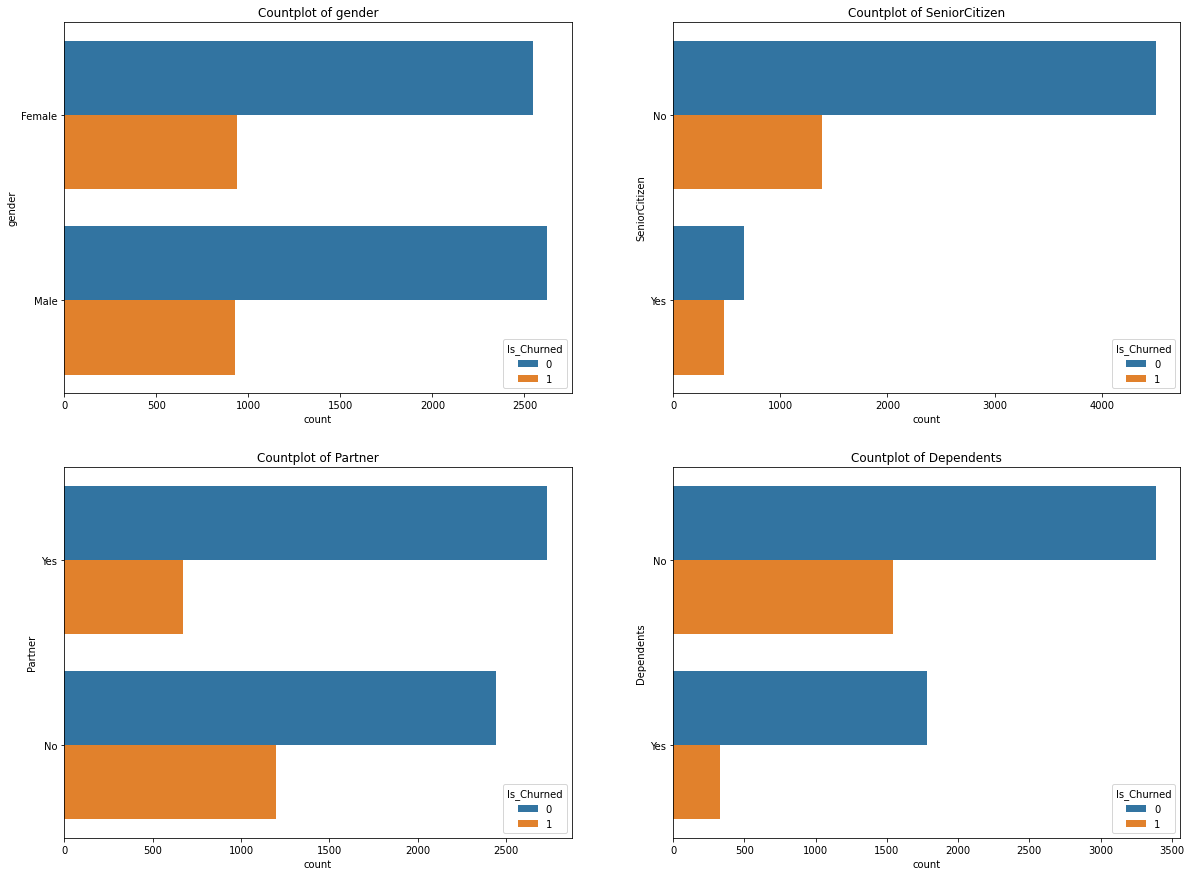

In [19]:
# Create visualization of distribution of data .countplot()
# Columns related to Demographic Informations

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(y='gender', hue='Is_Churned', data=data)
plt.title('Countplot of gender')

plt.subplot(2, 2, 2)
sns.countplot(y='SeniorCitizen', hue='Is_Churned', data=data)
plt.title('Countplot of SeniorCitizen')

plt.subplot(2, 2, 3)
sns.countplot(y='Partner', hue='Is_Churned', data=data)
plt.title('Countplot of Partner')

plt.subplot(2, 2, 4)
sns.countplot(y='Dependents', hue='Is_Churned', data=data)
plt.title('Countplot of Dependents')

plt.show()

Based on countplot graphs above, it can be seen that there is no particular charactheristic in `gender`'s feature. Both target's class show same proportional number in Male and Female.

There is unique characteristics in `Partner` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of `Partner`'s values.

On other hands, both `SeniorCitizen` and `Dependents` are no indicating unique characteristic in term of proportional ratio's way. They are presenting same typical proportions for each values in every target's classes. 

Therefor, only `Partner` can be considerably having adequate relationship with target `Is_Churned`.

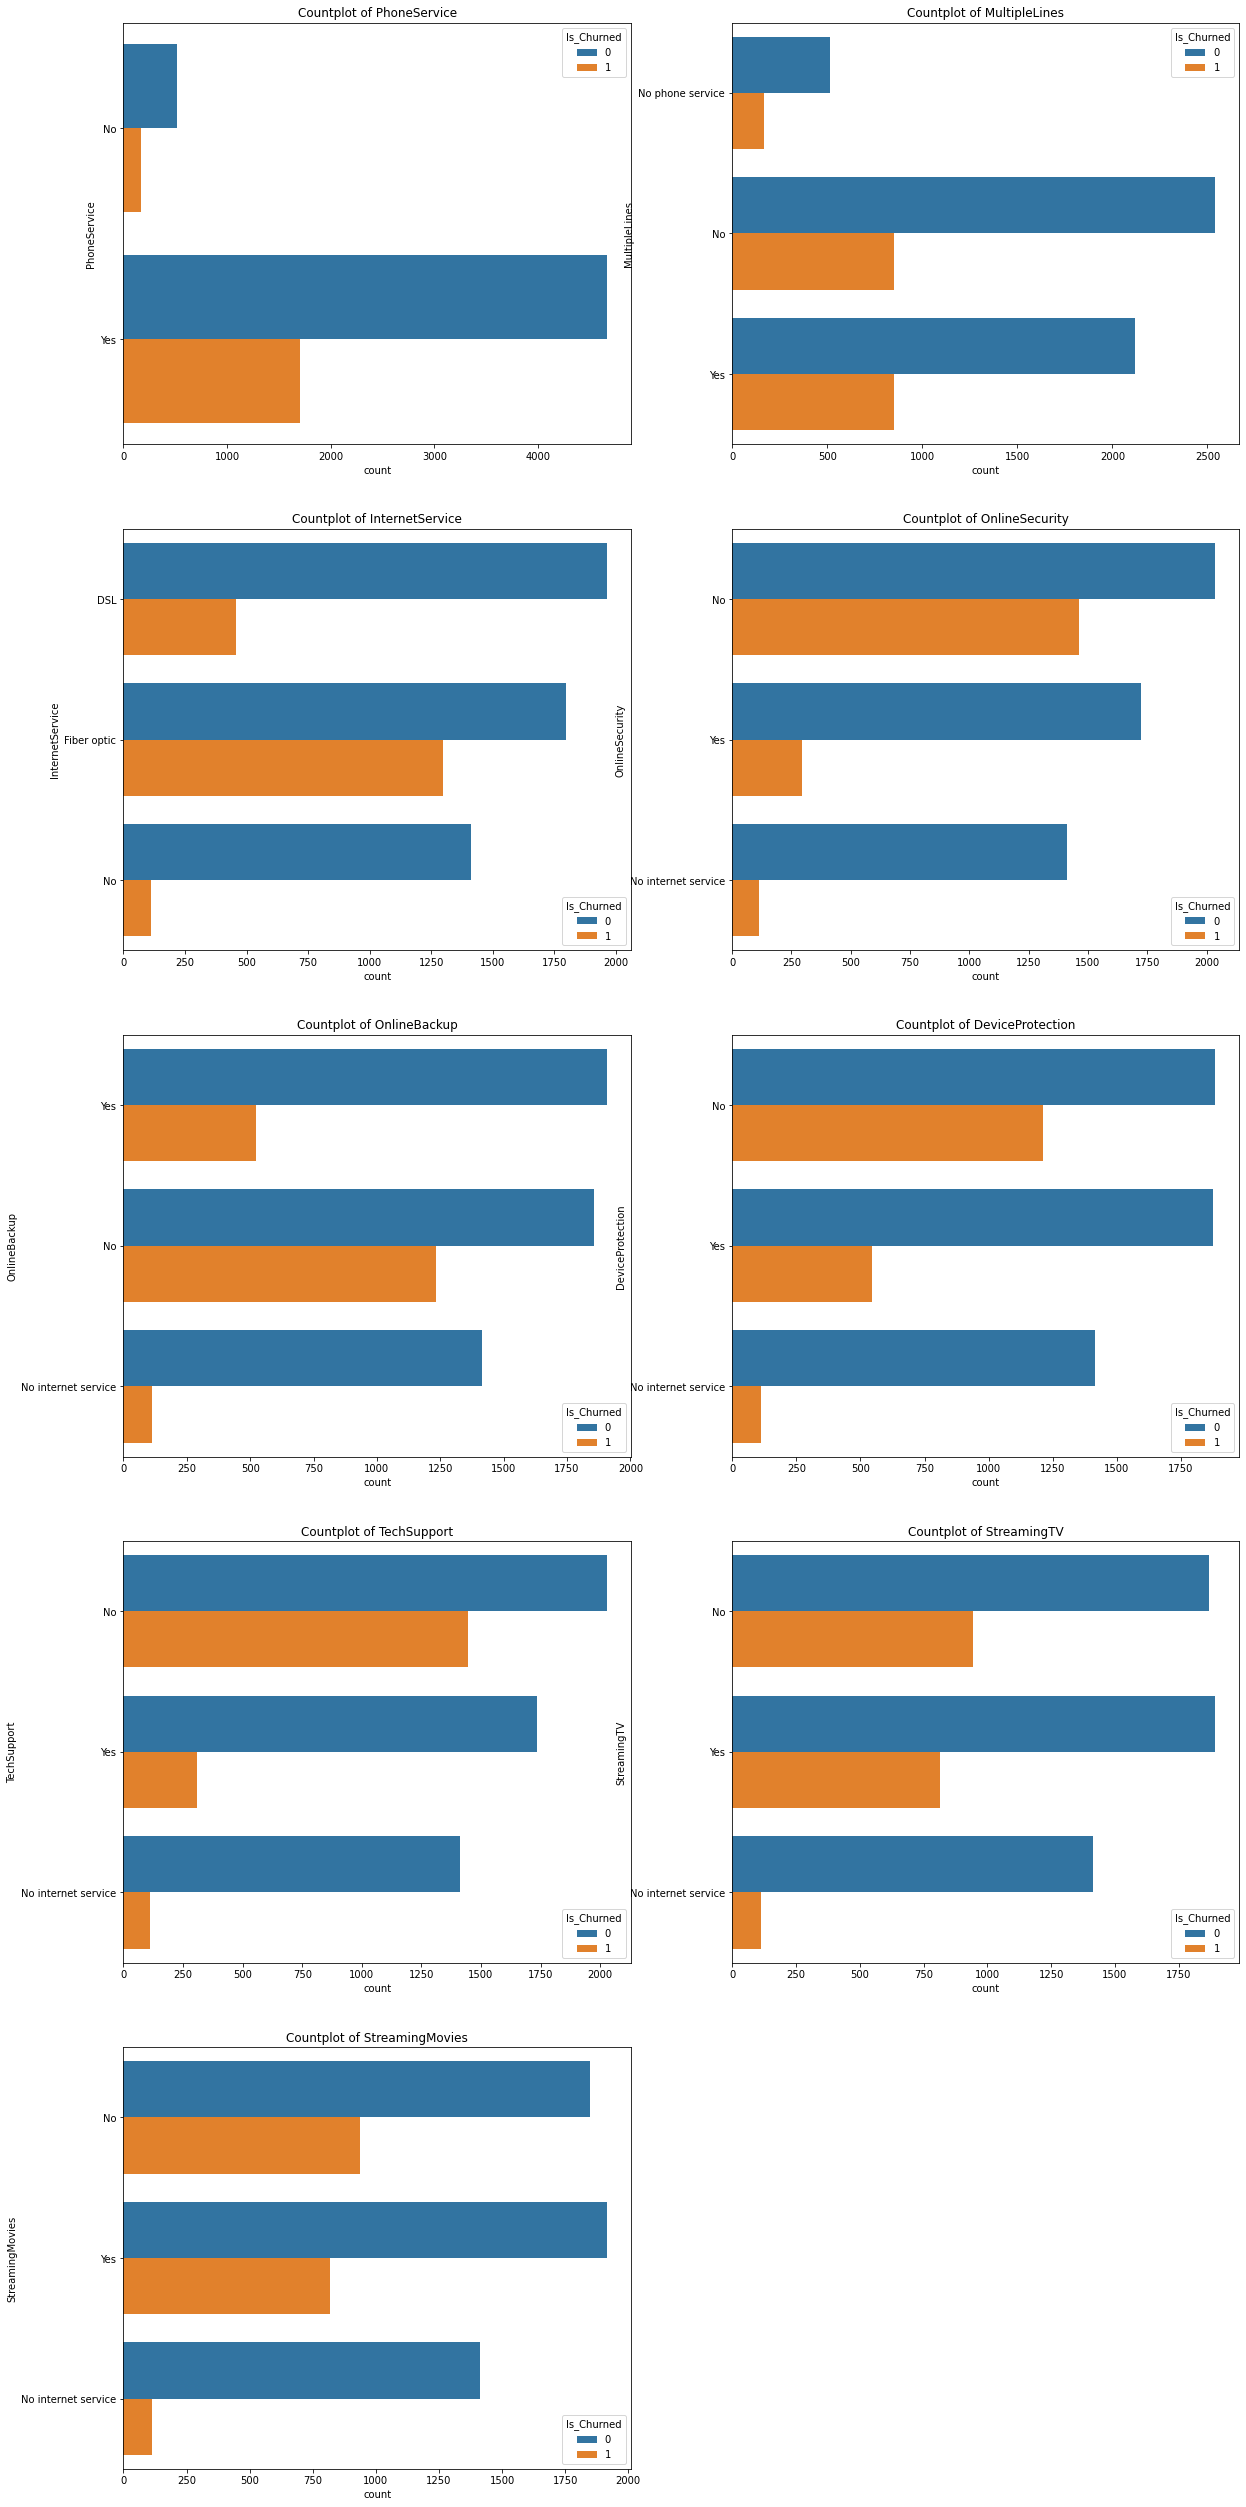

In [20]:
# Create visualization of distribution of data .countplot()
# Columns related to Typical Services that each customer has signed up for

plt.figure(figsize=(20, 45))

plt.subplot(5, 2, 1)
sns.countplot(y='PhoneService', hue='Is_Churned', data=data)
plt.title('Countplot of PhoneService')

plt.subplot(5, 2, 2)
sns.countplot(y='MultipleLines', hue='Is_Churned', data=data)
plt.title('Countplot of MultipleLines')

plt.subplot(5, 2, 3)
sns.countplot(y='InternetService', hue='Is_Churned', data=data)
plt.title('Countplot of InternetService')
    
plt.subplot(5, 2, 4)
sns.countplot(y='OnlineSecurity', hue='Is_Churned', data=data)
plt.title('Countplot of OnlineSecurity')

plt.subplot(5, 2, 5)
sns.countplot(y='OnlineBackup', hue='Is_Churned', data=data)
plt.title('Countplot of OnlineBackup')

plt.subplot(5, 2, 6)
sns.countplot(y='DeviceProtection', hue='Is_Churned', data=data)
plt.title('Countplot of DeviceProtection')

plt.subplot(5, 2, 7)
sns.countplot(y='TechSupport', hue='Is_Churned', data=data)
plt.title('Countplot of TechSupport')

plt.subplot(5, 2, 8)
sns.countplot(y='StreamingTV', hue='Is_Churned', data=data)
plt.title('Countplot of StreamingTV')

plt.subplot(5, 2, 9)
sns.countplot(y='StreamingMovies', hue='Is_Churned', data=data)
plt.title('Countplot of StreamingMovies')

plt.show()

Based on countplot graphs above, it can be seen that there are no particular charactheristics in features of `PhoneService`, `OnlineSecurity` and `TechSupport`. Both target's class show same typical proportions for each values in every target's classes.

On the contrary, there are unique characteristics in `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of mentioned features's values in every target's classes.

Customer who signed up for internet service for fiber optics tends to get churned higher than other internet's services. In aspect of streaming TV & movies, customer who did not sign up for these services tends to get churned higher than who signed up for. In aspect of online backup & device protection, customer who did not sign up for these services tends to get churned higher than who signed up for.

Therefor, `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` can be considerably having adequate relationships with target `Is_Churned`.

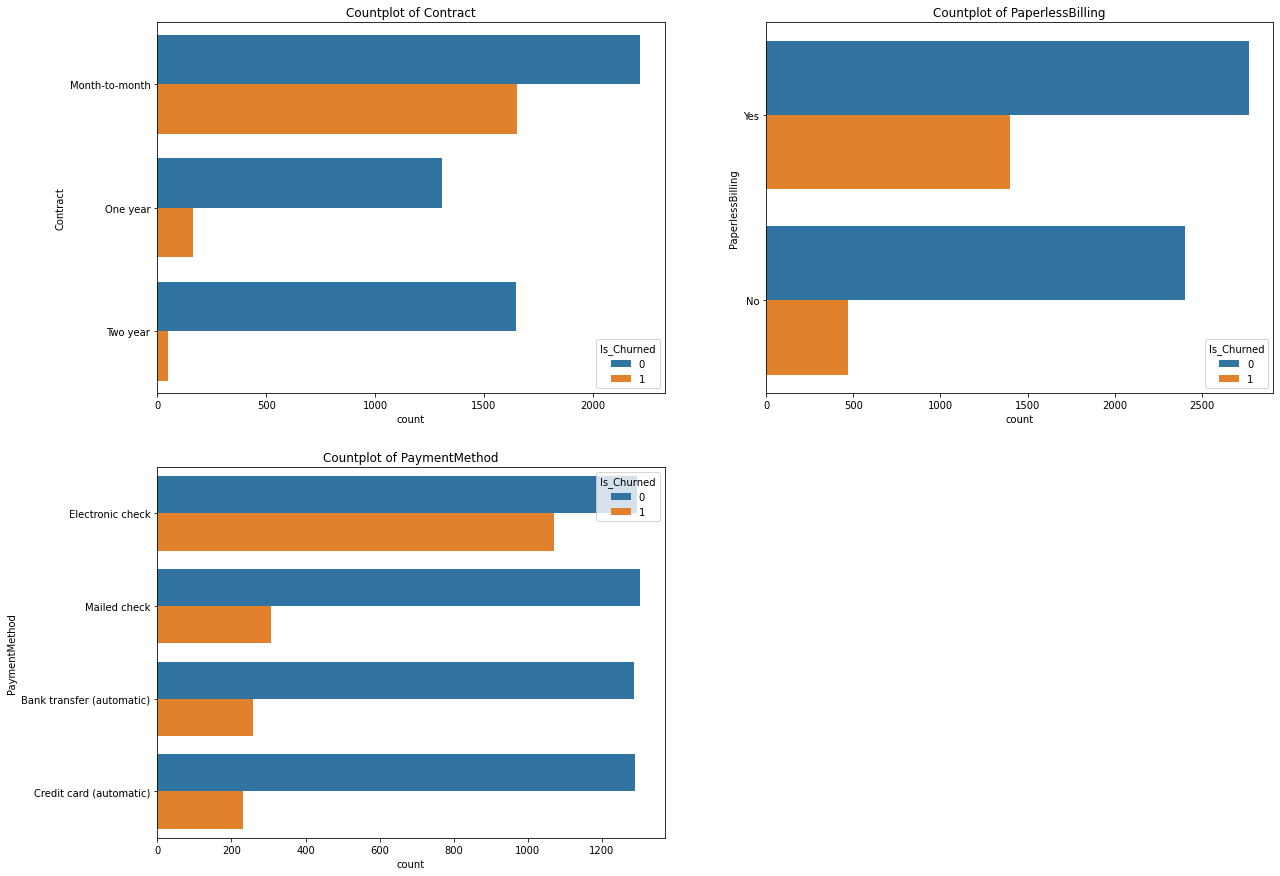

In [21]:
# Create visualization of distribution of data .countplot()
# Columns related to Typical Customer account information

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(y='Contract', hue='Is_Churned', data=data)
plt.title('Countplot of Contract')

plt.subplot(2, 2, 2)
sns.countplot(y='PaperlessBilling', hue='Is_Churned', data=data)
plt.title('Countplot of PaperlessBilling')

plt.subplot(2, 2, 3)
sns.countplot(y='PaymentMethod', hue='Is_Churned', data=data)
plt.title('Countplot of PaymentMethod')

plt.show()

Based on countplot graphs above, it can be seen that there is no particular charactheristics in features of `PaperlessBilling`. Target's class show same typical proportions for each values in every target's classes.

On the contrary, there are unique characteristics in `Contract`, and `PaymentMethod` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of mentioned features's values in every target's classes. 

Customer who is commited his contract by month-to-month basis tends to get churned higher than yearly basis. In aspect of payment method, customer who use electronic check as his method for payment tends to get churned higher than any other types of payment.

Therefor, `Contract`, and `PaymentMethod` can be considerably having adequate relationships with target `Is_Churned`.

## v. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Get Data for Model Inference

In [22]:
# Create data_inf for further model inference randomly selected from dataset for 15 samples 

data_inf = data.sample(15, random_state=25)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Is_Churned
4864,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,Male,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,Female,No,No,No,6,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,Female,No,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,Female,No,Yes,No,19,Yes,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,Female,No,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,Female,No,No,No,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


### Get Data for Train Val Test Set

In [23]:
# Segragate Inference Set from dataset for train_test dataset

data_trainval_test = data.drop(data_inf.index)
data_trainval_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Is_Churned
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [24]:
# Rearrange index of Inference Set & Train-Val-Test Set (to minimalise error occurance due to indexing)

data_trainval_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [25]:
# Preview data_train_test 

data_trainval_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Is_Churned
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Splitting Dataset

In [26]:
# Split columns between features and target

X = data_trainval_test.drop('Is_Churned', axis=1)
y = data_trainval_test[['Is_Churned']]

In [27]:
# Preview features 'X'

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [28]:
# Preview target 'y'

y.head()

,Is_Churned
0,0
1,0
2,1
3,0
4,1


In [29]:
# Split features for Training & Validation Set (80%) and Testing Set (20%)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print('Shape of Train & Val Set: ', X_trainval.shape)
print('Shape of Test Set \t: ', X_test.shape)

Shape of Train & Val Set:  (5622, 19)
Shape of Test Set 	:  (1406, 19)


In [30]:
# Split training set and validation set features for Training Set (80%) and Validation Set (20%)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=25)

print('Shape of Train-Set : ', X_train.shape)
print('Shape of Valid-Set : ', X_val.shape)
print('Shape of Test-Set  : ', X_test.shape)

Shape of Train-Set :  (4497, 19)
Shape of Valid-Set :  (1125, 19)
Shape of Test-Set  :  (1406, 19)


### Handling Missing Values

#### *In Train-Set - Features*

In [31]:
# Check null-value in train-set 

print(X_train.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
dtype: int64


In [32]:
# Preview null-value in 'TotalCharges'

index_null_train = X_train[(X_train['TotalCharges'].isnull() == True)].index.tolist()
X_train[(X_train['TotalCharges'].isnull() == True)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6739,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
934,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
1338,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
6655,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3325,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN


Since we already know this feature is rightly skewed distribution, and the missingness is preassumbly as MCAR because there is no direct correlation to target. We can drop these rows or imputes with its median value. Firstly, we will check percentage of missingness (np.NaN).

In [33]:
# Calculate percentage of null-value in feature 'TotalCharges'

print('total missing value in this feature \t:', len(index_null_train))
print('% percentage of missingness \t\t:', len(index_null_train)/len(X_train)*100)

total missing value in this feature 	: 5
% percentage of missingness 		: 0.11118523460084502


In [34]:
# Since percentage is below than 5%, we can drop the rows which contain missing values

X_train.drop(index_null_train, axis=0, inplace=True)

In [35]:
X_train.shape

(4492, 19)

#### *In Train-Set - Target*

In [36]:
# Drop the rows which contain missing values in feature's 

y_train.drop(index_null_train, axis=0, inplace=True)

In [37]:
y_train.shape

(4492, 1)

#### *In Valid-Set - Features*

In [38]:
# Check null-value in val-set 

print(X_val.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64


In [39]:
# Preview null-value in 'TotalCharges'

index_null_val = X_val[(X_val['TotalCharges'].isnull() == True)].index.tolist()
X_val[(X_val['TotalCharges'].isnull() == True)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3818,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1080,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN


In [40]:
# Calculate percentage of null-value in feature 'TotalCharges'

print('total missing value in this feature \t:', len(index_null_val))
print('% percentage of missingness \t\t:', len(index_null_val)/len(X_val)*100)

total missing value in this feature 	: 2
% percentage of missingness 		: 0.17777777777777778


In [41]:
# Since percentage is below than 5%, we can drop the rows which contain missing values

X_val.drop(index_null_val, axis=0, inplace=True)

In [42]:
X_val.shape

(1123, 19)

#### *In Valid-Set - Target*

In [43]:
# Drop the rows which contain missing values in feature's 

y_val.drop(index_null_val, axis=0, inplace=True)

In [44]:
y_val.shape

(1123, 1)

#### *In Test-Set - Features*

Basically, handling missing value in test test will be following handling in train-val set.

In [45]:
# Check null-value in test set 

print(X_test.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
dtype: int64


In [46]:
# Preview null-value in 'TotalCharges'

index_null_test = X_test[(X_test['TotalCharges'].isnull() == True)].index.tolist()
X_test[(X_test['TotalCharges'].isnull() == True)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4371,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
487,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
752,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
5207,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN


In [47]:
# Calculate percentage of null-value in feature 'TotalCharges'

print('total missing value in this feature \t:', len(index_null_test))
print('% percentage of missingness \t\t:', len(index_null_test)/len(X_test)*100)

total missing value in this feature 	: 4
% percentage of missingness 		: 0.2844950213371266


In [48]:
# Since percentage is below than 5%, we can drop the rows which contain missing values

X_test.drop(index_null_test, axis=0, inplace=True)

In [49]:
X_test.shape

(1402, 19)

#### *In Test-Set - Target*

In [50]:
# Drop the rows which contain missing values in feature's 

y_test.drop(index_null_test, axis=0, inplace=True)

In [51]:
y_test.shape

(1402, 1)

### Handling Outliers

#### *In Train-Set - Features*

In [52]:
# Create function to boundaries for skewed distribution by using Tukey's Rule atau IQR method
# IQR factor is defined as 1,5 since -1,0 < skewness value < 1,0

def find_skewed_boundaries(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    upper_boundary = df[variable].quantile(0.75) + (IQR * factor)

    return upper_boundary, lower_boundary

In [53]:
# Create function to boundaries for normal distribution by Z-Score

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [54]:
# Define bpundary values to find out outliers

upper_tenure, lower_tenure = find_normal_boundaries(X_train, 'tenure')
upper_monthly, lower_monthly = find_normal_boundaries(X_train, 'MonthlyCharges')
upper_total, lower_total = find_skewed_boundaries(X_train, 'TotalCharges', 1.5)

In [55]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4492.0,32.223063,24.424658,1.00,9.00,29.00,55.0000,72.00
MonthlyCharges,4492.0,64.659228,30.106126,18.25,35.45,70.15,89.8500,118.75
TotalCharges,4492.0,2265.770793,2260.000715,18.85,401.25,1386.95,3759.7875,8672.45


In [56]:
# Flag outliers in these features

outliers_tenure = np.where(X_train['tenure'] > upper_tenure, True, False)
outliers_monthly = np.where(X_train['MonthlyCharges'] > upper_monthly, True, False)
outliers_total = np.where(X_train['TotalCharges'] > upper_total, True, False)

X_train_trimmed = X_train.loc[~(outliers_tenure + outliers_monthly + outliers_total)]
print('Shape prior trimming : ', X_train.shape)
print('Shape after trimming : ', X_train_trimmed.shape)

Shape prior trimming :  (4492, 19)
Shape after trimming :  (4492, 19)


We can see that there are no outliers within these features.

#### *In Train-Set - Target*

No action due to no outliers in features.

#### *In Valid-Set - Features*

In [57]:
# Define bpundary values to find out outliers

upper_tenure, lower_tenure = find_normal_boundaries(X_val, 'tenure')
upper_monthly, lower_monthly = find_normal_boundaries(X_val, 'MonthlyCharges')
upper_total, lower_total = find_skewed_boundaries(X_val, 'TotalCharges', 1.5)

In [58]:
# Flag outliers in these features

outliers_tenure = np.where(X_val['tenure'] > upper_tenure, True, False)
outliers_monthly = np.where(X_val['MonthlyCharges'] > upper_monthly, True, False)
outliers_total = np.where(X_val['TotalCharges'] > upper_total, True, False)

X_val_trimmed = X_val.loc[~(outliers_tenure + outliers_monthly + outliers_total)]
print('Shape prior trimming : ', X_val.shape)
print('Shape after trimming : ', X_val_trimmed.shape)

Shape prior trimming :  (1123, 19)
Shape after trimming :  (1123, 19)


We can see that there are no outliers within these features.

#### *In Valid-Set - Target*

We can see that there are no outliers within these features.

### Feature Selection

In [59]:
# Preview all features which will be selected for further steps

X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Based on analysis in Explatory Data Analysis for both numerical and categorical features, there are some features which have adequate correlations to classification label in `Is_Churned`. Justification of selection basically relies on evaluation of heatmap correlation, countplot visualization's characteristics, and grouping & aggregating of features. The feature selection result are as follows:
- *Numerical*
    - `tenure` : average value of `tenure` in class `Is_Churned` = 1 lower than class `Is_Churned` = 0.
    - `MonthlyCharges` : average value of `MonthlyCharges` in class `Is_Churned` = 1 higher than class `Is_Churned` = 0.
    - `TotalCharges` : average value of `TotalCharges` in class `Is_Churned` = 1 lower than class `Is_Churned` = 0.
- *Categorical*
    - `Partner` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `Partner`.
    - `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies`.
    - `Contract`, and `PaymentMethod` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `Contract`, and `PaymentMethod`.

In [60]:
# Create list of columns that will be dropped or not selected for further steps.

drop_col = ['gender', 'SeniorCitizen', 'Dependents','PhoneService', 'OnlineSecurity',
            'TechSupport', 'PaperlessBilling']

X_train.drop(drop_col, axis=1, inplace=True)
X_val.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)

In [61]:
# Preview selected features for further steps

X_train.head()

,Partner,tenure,MultipleLines,InternetService,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
1704,No,3,No,Fiber optic,No,Yes,No,No,Month-to-month,Electronic check,73.85,196.40
2802,Yes,2,No,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,97.10,184.15
6018,No,43,No phone service,DSL,No,Yes,Yes,Yes,Month-to-month,Bank transfer (automatic),49.05,2076.20
5020,No,6,No,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Mailed check,94.50,575.45
819,Yes,43,No,DSL,No,Yes,Yes,Yes,Two year,Credit card (automatic),79.15,3566.60


In [62]:
# Preview selected features for further steps

X_val.head()

,Partner,tenure,MultipleLines,InternetService,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
864,Yes,62,No phone service,DSL,No,No,Yes,No,Two year,Bank transfer (automatic),39.00,2337.45
1559,No,1,Yes,Fiber optic,No,No,No,No,Month-to-month,Electronic check,74.95,74.95
2478,Yes,2,No,DSL,No,No,No,No,Month-to-month,Electronic check,45.00,89.75
843,Yes,15,No,No,No internet service,No internet service,No internet service,No internet service,One year,Mailed check,20.55,295.95
6055,No,7,No phone service,DSL,No,Yes,No,No,One year,Mailed check,35.30,264.80


In [63]:
# Preview selected features for further steps

X_test.head()

,Partner,tenure,MultipleLines,InternetService,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
5106,No,66,No phone service,DSL,No,Yes,Yes,Yes,Two year,Bank transfer (automatic),61.35,4193.40
3180,Yes,58,No,No,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),20.30,1160.75
4069,Yes,22,No,DSL,No,Yes,Yes,No,One year,Bank transfer (automatic),67.50,1544.05
3626,No,72,Yes,Fiber optic,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic),113.80,7845.80
4908,Yes,51,No,No,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),19.55,1086.75


### Splitting between Numerical Columns and Categorical Columns

In [64]:
# Get features list of numerical features and categorical features in num_columns dan cat_columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Selected features categorized as numerical: \n', num_columns)
print('Selected features categorized as categorical: \n', cat_columns)

Selected features categorized as numerical: 
 ['tenure', 'MonthlyCharges', 'TotalCharges']
Selected features categorized as categorical: 
 ['Partner', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [65]:
# Get features list of normal distribution of features and skewed distribution of features in num_columns

norm_columns = ['tenure', 'MonthlyCharges']
skew_columns = ['TotalCharges']

In [66]:
# Create pipeline transformer for feature scaling and encoding

prep_pipeline = ColumnTransformer([
                ('std_scaler', StandardScaler(), norm_columns),
                ('mms_scaler', MinMaxScaler(), skew_columns),
                ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns)
                ])

### Concating between Numerical Columns and Categorical Columns

In [67]:
# Concanate numerical and categorical features after feature scalling and encoding into one arrays

X_train_final = prep_pipeline.fit_transform(X_train)
X_val_final = prep_pipeline.transform(X_val)
X_test_final = prep_pipeline.transform(X_test)

In [68]:
X_train_final.shape

(4492, 30)

In [69]:
# Get encoded columns names 

cat_encoder = prep_pipeline.named_transformers_['cat']
enc_columns = ['Partner_No', 'Partner_Yes', 'MultipleLines_No', 'MultipleLines_NoPhoneService', 'MultipleLines_Yes',
               'InternetService_DSL', 'InternetService_FiberOptic', 'InternetService_No', 'OnlineBackup_No', 'OnlineBackup_NoInternetService',
               'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_NoInternetService', 'DeviceProtection_Yes', 'StreamingTV_No',
               'StreamingTV_NoInternetService', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_NoInternetService', 'StreamingMovies_Yes', 
               'Contract_Month-to-month', 'Contract_OneYear', 'Contract_TwoYear', 'PaymentMethod_BankTransferAutomatic', 'PaymentMethod_CCAutomatic',
               'PaymentMethod_ElectronicCheck', 'PaymentMethod_MailCheck']

In [70]:
# Convert `X_train_final` into dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[norm_columns+skew_columns+enc_columns])
X_train_final_df

,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_DSL,InternetService_FiberOptic,...,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransferAutomatic,PaymentMethod_CCAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailCheck
0,-1.196591,0.305313,0.020517,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.237537,1.077667,0.019102,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.441281,-0.518531,0.237745,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.073750,0.991296,0.064320,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.441281,0.481377,0.409974,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,0.727908,-0.985266,0.203794,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4488,-0.746176,1.027838,0.144963,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4489,1.301164,1.471319,0.819595,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4490,1.628738,0.730523,0.702066,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
# Convert `X_val_final` into dataframe

X_val_final_df = pd.DataFrame(X_val_final, columns=[norm_columns+skew_columns+enc_columns])
X_val_final_df

,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_DSL,InternetService_FiberOptic,...,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransferAutomatic,PaymentMethod_CCAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailCheck
0,1.219270,-0.852387,0.267935,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-1.278484,0.341855,0.006483,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.237537,-0.653070,0.008193,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.705229,-1.465288,0.032021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.032803,-0.975300,0.028422,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,0.686962,-1.460305,0.117084,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1119,0.850749,1.036143,0.577494,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1120,0.195600,0.801945,0.383852,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1121,0.973589,1.130818,0.652983,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# Convert bentuk `X_test_final` into dataframe

X_test_final_df = pd.DataFrame(X_test_final, columns=[norm_columns+skew_columns+enc_columns])
X_test_final_df

,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_DSL,InternetService_FiberOptic,...,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransferAutomatic,PaymentMethod_CCAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailCheck
0,1.383057,-0.109931,0.482406,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.055483,-1.473593,0.131957,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.418602,0.094369,0.176250,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.628738,1.632433,0.904473,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.768855,-1.498507,0.123405,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,-0.705229,-0.320875,0.085311,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1398,-1.114697,0.682355,0.052689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1399,0.727908,0.496325,0.462854,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1400,1.546844,-0.666358,0.351218,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Input Pipelines with Tensorflow

In [73]:
# Create a training Dataset pipelines, slice and shuffle train dataset.

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(buffer_size=128, seed=25).batch(64)

# Get validation dataset.
valid_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(64)

# Get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(64)

In [74]:
# Check How Many Batch Groups

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_dataset).numpy())
print('Number of Batch - Valid : ', tf.data.experimental.cardinality(valid_dataset).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_dataset).numpy())

Number of Batch - Train :  71
Number of Batch - Valid :  18
Number of Batch - Test  :  22


## vi. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



In this case, an objectives which is expected to be performed is a deep learning (Neural Network) model that able to predict classification of `Is_Churned` from telecommunication customer's churn dataset. Hence, there are two types of neural network which will be trained and evaluated as follows:

1. **Sequential API** 
2. **Functional API**

## vii. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Sequential API

#### Build 1st Sequential API Model

*Building with 2 hidden layers (32 neuorons for each hidden layers) & without activation function in hidden layers*

In [75]:
# Declare 1st Sequential API model

model_s1 = Sequential([
                    Dense(32, input_shape=(30,)),
                    Dense(32),
                    Dense(1, activation='sigmoid'),
                    ])

*Using optimizer 'sgd' refers to stochastic gradient descent, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [76]:
# Compile 1st Sequential API model

model_s1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [77]:
# Train 1st Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s1 = model_s1.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 1s 2ms/step - loss: 0.6202 - accuracy: 0.6561 - val_loss: 0.5181 - val_accuracy: 0.7329 - lr: 0.0100
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7640 - val_loss: 0.4847 - val_accuracy: 0.7614 - lr: 0.0100
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7827 - val_loss: 0.4705 - val_accuracy: 0.7649 - lr: 0.0100
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7892 - val_loss: 0.4669 - val_accuracy: 0.7631 - lr: 0.0100
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7936 - val_loss: 0.4629 - val_accuracy: 0.7711 - lr: 0.0100
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7974 - val_loss: 0.4605 - val_accuracy: 0.7729 - lr: 0.0100
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4

71/71 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8045 - val_loss: 0.4454 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 54/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8048 - val_loss: 0.4454 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 55/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8048 - val_loss: 0.4454 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 56/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8050 - val_loss: 0.4454 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 57/100
71/71 [==============================] - 0s 971us/step - loss: 0.4170 - accuracy: 0.8050 - val_loss: 0.4454 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 58/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8050 - val_loss: 0.4454 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 59/100
71/71 [==============================] - 0s 

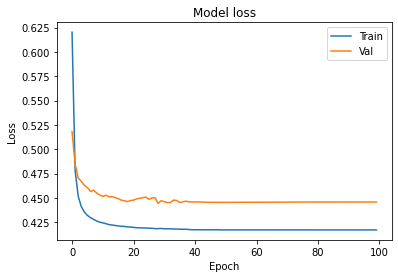

In [78]:
# Plot loss & accuracy of 1st Sequential API model

plt.plot(history_s1.history['loss'])
plt.plot(history_s1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

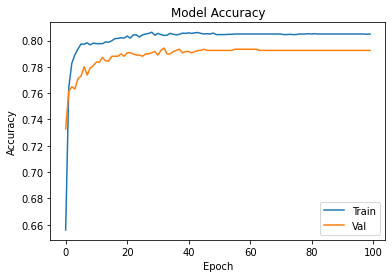

In [79]:
plt.plot(history_s1.history['accuracy'])
plt.plot(history_s1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 1st sequential API model indicates a constant loss along epochs between train and valid set with around 0,025 points. While, model accuracy between train and valid set are constantly apart around 0,010 points. 

#### Build 2nd Sequential API Model

*Building with 2 hidden layers (32 neuorons for each hidden layers) & with activation function 'relu' in hidden layers*

In [80]:
# Declare 2nd Sequential API model

model_s2 = Sequential([
                    Dense(32, activation='relu', input_shape=(30,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])

*Still uing optimizer 'sgd' refers to stochastic gradient descent, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [81]:
# Compile 2nd Sequential API model

model_s2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [82]:
# Train 2nd Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s2 = model_s2.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6369 - val_loss: 0.5876 - val_accuracy: 0.7177 - lr: 0.0100
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7380 - val_loss: 0.5522 - val_accuracy: 0.7240 - lr: 0.0100
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7393 - val_loss: 0.5301 - val_accuracy: 0.7266 - lr: 0.0100
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7429 - val_loss: 0.5128 - val_accuracy: 0.7311 - lr: 0.0100
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7536 - val_loss: 0.4992 - val_accuracy: 0.7364 - lr: 0.0100
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7611 - val_loss: 0.4891 - val_accuracy: 0.7462 - lr: 0.0100
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4

Epoch 54/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8054 - val_loss: 0.4484 - val_accuracy: 0.7907 - lr: 0.0100
Epoch 55/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8068 - val_loss: 0.4483 - val_accuracy: 0.7907 - lr: 0.0100
Epoch 56/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8059 - val_loss: 0.4487 - val_accuracy: 0.7925 - lr: 0.0100
Epoch 57/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8057 - val_loss: 0.4480 - val_accuracy: 0.7925 - lr: 0.0100
Epoch 58/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8068 - val_loss: 0.4484 - val_accuracy: 0.7943 - lr: 0.0100
Epoch 59/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8065 - val_loss: 0.4479 - val_accuracy: 0.7934 - lr: 0.0100
Epoch 60/100
71/71 [==============================] - 0s 1ms/step - lo

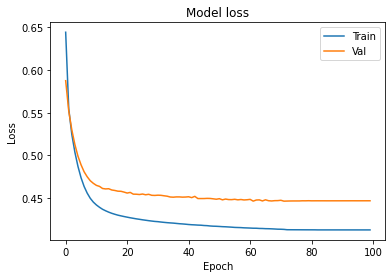

In [83]:
# Plot loss & accuracy of 2nd Sequential API model

plt.plot(history_s2.history['loss'])
plt.plot(history_s2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

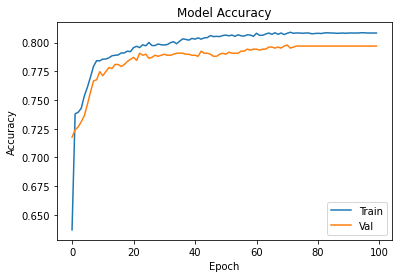

In [84]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 2nd sequential API model gradually indicates loss to lower value along epochs between train and valid set but their loss line are still apart around 0,030 points. While, model accuracy between train and valid set initially looks slightly volatile uptrending along 100 epochs, with discrepancy around 0,017 points.

#### Build 3rd Sequential API Model

*Building with 3 hidden layers (128 neuorons for each hidden layers) & with activation function 'relu' in hidden layers*

In [85]:
# Declare 3rd Sequential API model

model_s3 = Sequential([
                    Dense(128, activation='relu', input_shape=(30,)),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])

*Still uing optimizer 'sgd' refers to stochastic gradient descent, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [86]:
# Compile 3rd Sequential API model

model_s3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [87]:
# Train 3rd Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s3 = model_s3.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6603 - val_loss: 0.5739 - val_accuracy: 0.7204 - lr: 0.0100
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7364 - val_loss: 0.5353 - val_accuracy: 0.7204 - lr: 0.0100
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7364 - val_loss: 0.5109 - val_accuracy: 0.7204 - lr: 0.0100
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7375 - val_loss: 0.4911 - val_accuracy: 0.7240 - lr: 0.0100
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7640 - val_loss: 0.4756 - val_accuracy: 0.7462 - lr: 0.0100
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7861 - val_loss: 0.4687 - val_accuracy: 0.7587 - lr: 0.0100
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4

Epoch 54/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8103 - val_loss: 0.4428 - val_accuracy: 0.7961 - lr: 1.0000e-03
Epoch 55/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8112 - val_loss: 0.4429 - val_accuracy: 0.7961 - lr: 1.0000e-03
Epoch 56/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8110 - val_loss: 0.4428 - val_accuracy: 0.7943 - lr: 1.0000e-03
Epoch 57/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8117 - val_loss: 0.4428 - val_accuracy: 0.7943 - lr: 1.0000e-03
Epoch 58/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8114 - val_loss: 0.4425 - val_accuracy: 0.7934 - lr: 1.0000e-03
Epoch 59/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8108 - val_loss: 0.4425 - val_accuracy: 0.7934 - lr: 1.0000e-03
Epoch 60/100
71/71 [==========================

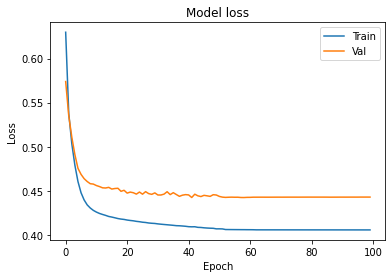

In [88]:
# Plot loss & accuracy of 3rd Sequential API model

plt.plot(history_s3.history['loss'])
plt.plot(history_s3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

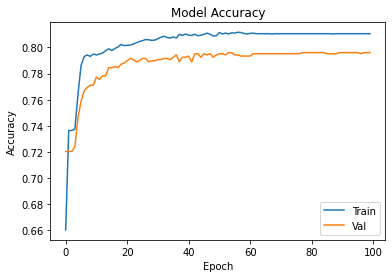

In [89]:
plt.plot(history_s3.history['accuracy'])
plt.plot(history_s3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 3rd sequential API model gradually indicates loss to lower value along epochs between train and valid set but their loss line are still apart around 0,040 points. While, model accuracy between train and valid set initially looks slightly volatile uptrending until epochs 60, then becomes constant to the end with discrepancy around 0,016 points.

#### Build 4th Sequential API Model

*Building with 3 hidden layers (128 neuorons for each hidden layers) & with activation function 'relu' in hidden layers*

In [90]:
# Declare 4th Sequential API model

model_s4 = Sequential([
                    Dense(128, activation='relu', input_shape=(30,)),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])

*Changing optimizer to 'adam' refers to Adam, most common optimizers, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [91]:
# Compile 4th Sequential API model

model_s4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [92]:
# Train 4th Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s4 = model_s4.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7654 - val_loss: 0.4486 - val_accuracy: 0.7854 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7999 - val_loss: 0.4543 - val_accuracy: 0.7809 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8032 - val_loss: 0.4494 - val_accuracy: 0.7872 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8025 - val_loss: 0.4487 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8039 - val_loss: 0.4474 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8074 - val_loss: 0.4479 - val_accuracy: 0.7961 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4

71/71 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8444 - val_loss: 0.5277 - val_accuracy: 0.7783 - lr: 1.0000e-04
Epoch 54/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8446 - val_loss: 0.5288 - val_accuracy: 0.7783 - lr: 1.0000e-04
Epoch 55/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8448 - val_loss: 0.5323 - val_accuracy: 0.7774 - lr: 1.0000e-04
Epoch 56/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8455 - val_loss: 0.5327 - val_accuracy: 0.7747 - lr: 1.0000e-04
Epoch 57/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8444 - val_loss: 0.5327 - val_accuracy: 0.7711 - lr: 1.0000e-04
Epoch 58/100
71/71 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8462 - val_loss: 0.5339 - val_accuracy: 0.7729 - lr: 1.0000e-04
Epoch 59/100
71/71 [==============================] - 0s 2m

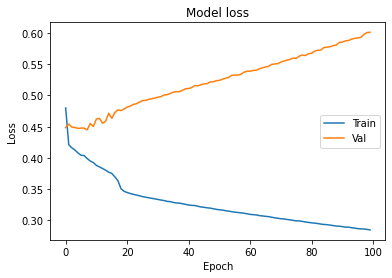

In [93]:
# Plot loss & accuracy of 4th Sequential API model

plt.plot(history_s4.history['loss'])
plt.plot(history_s4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='right')
plt.show()

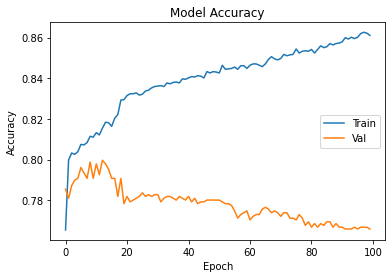

In [94]:
plt.plot(history_s4.history['accuracy'])
plt.plot(history_s4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='right')
plt.show()

We can see that 4th sequential API model indicates both loss and accuracy are divergent. Learning curve in train set in function loss significantly decreases into 0,30 meanwhile in valid test surprisingly increases into 0,60. This divergence also happens in model accuracy's learning curve. It is a clear sign in which this model tends to overfitting.

#### Build 5th Sequential API Model

*Building with 3 hidden layers (128 neuorons for each hidden layers) & with activation function 'relu' in hidden layers. Adding L2 regularization into parameter in our overall loss function, and weight them by 0.01. Setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training*

In [95]:
# Declare 5th Sequential API model

model_s5 = Sequential([
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(30,)), Dropout(0.3),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
                    Dense(1, activation='sigmoid'),
                    ])

*Still using optimizer to 'adam' refers to Adam, most common optimizers, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [96]:
# Compile 5th Sequential API model

model_s5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [97]:
# Train 5th Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s5 = model_s5.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 2.3330 - accuracy: 0.7382 - val_loss: 1.3883 - val_accuracy: 0.7756 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.9873 - accuracy: 0.7916 - val_loss: 0.7404 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7972 - val_loss: 0.5626 - val_accuracy: 0.7827 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7954 - val_loss: 0.5200 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7943 - val_loss: 0.5024 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7990 - val_loss: 0.4930 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4

Epoch 54/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8010 - val_loss: 0.4618 - val_accuracy: 0.7943 - lr: 1.0000e-04
Epoch 55/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8034 - val_loss: 0.4615 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 56/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8034 - val_loss: 0.4623 - val_accuracy: 0.7952 - lr: 1.0000e-04
Epoch 57/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8001 - val_loss: 0.4617 - val_accuracy: 0.7952 - lr: 1.0000e-04
Epoch 58/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7985 - val_loss: 0.4616 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 59/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8041 - val_loss: 0.4619 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 60/100
71/71 [==========================

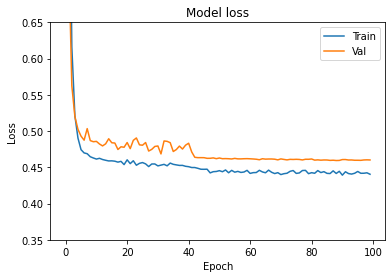

In [98]:
# Plot loss & accuracy of 4th Sequential API model

plt.plot(history_s5.history['loss'])
plt.plot(history_s5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim((0.35, 0.65))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

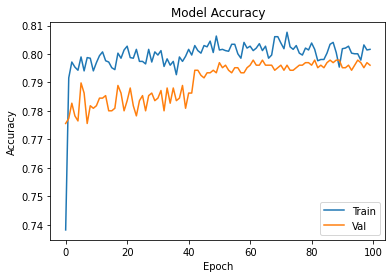

In [99]:
plt.plot(history_s5.history['accuracy'])
plt.plot(history_s5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 5th sequential API model gradually indicates loss to lower value along epochs between train and valid set and converges into 0,45 (discrepancy around 0,020 points). While, model accuracy between train and valid set initially looks significantly volatile uptrending along epochs and never becomes constant to the end, yet convergent to 0,80 (with discrepancy close to 0,001 points).

#### Build 6th Sequential API Model

*Building with 3 hidden layers (256 neuorons for 1st hidden layers, 128 neurons for 2nd hidden layers, and 64 neurons for 3rd hidden layers) & with activation function 'relu' in hidden layers. Adding initializer HeNormal and L2 regularization into parameter in our overall loss function, and weight them by 0.01. Setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Setting batch normalization prior activation function in hidden layer-2 & hidden layer-3*

In [100]:
# Declare 6th Sequential API model

model_s6 = Sequential([
                    Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(seed=25), kernel_regularizer=regularizers.l2(0.01), input_shape=(30,)), Dropout(0.3), BatchNormalization(),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), BatchNormalization(),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
                    Dense(1, activation='sigmoid'),
                    ])

*Changing optimizer to 'adamax' refers to Adamax, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [101]:
# Compile 6th Sequential API model

model_s6.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [102]:
# Train 6th Sequential API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s6 = model_s6.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 7.4599 - accuracy: 0.6797 - val_loss: 6.7436 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 6.3305 - accuracy: 0.7500 - val_loss: 5.8387 - val_accuracy: 0.7711 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 5.5012 - accuracy: 0.7565 - val_loss: 5.1105 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 4.8253 - accuracy: 0.7651 - val_loss: 4.5046 - val_accuracy: 0.7747 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 4.2602 - accuracy: 0.7736 - val_loss: 3.9966 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 3.7978 - accuracy: 0.7776 - val_loss: 3.5781 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 3.4

Epoch 54/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8077 - val_loss: 0.5383 - val_accuracy: 0.8059 - lr: 0.0010
Epoch 55/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8005 - val_loss: 0.5393 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 56/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.8048 - val_loss: 0.5424 - val_accuracy: 0.7979 - lr: 0.0010
Epoch 57/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8092 - val_loss: 0.5454 - val_accuracy: 0.7996 - lr: 0.0010
Epoch 58/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8103 - val_loss: 0.5463 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 59/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.8123 - val_loss: 0.5446 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 60/100
71/71 [==============================] - 0s 3ms/step - lo

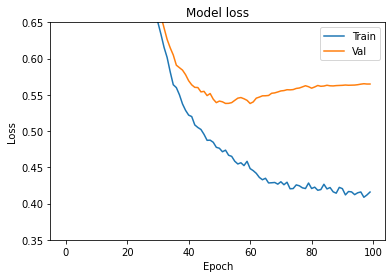

In [103]:
# Plot loss & accuracy of 6th Sequential API model

plt.plot(history_s6.history['loss'])
plt.plot(history_s6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim((0.35, 0.65))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

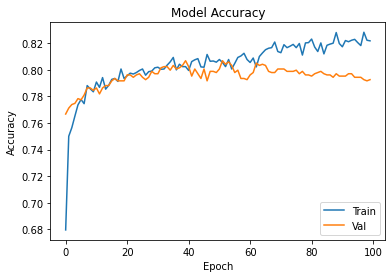

In [104]:
plt.plot(history_s6.history['accuracy'])
plt.plot(history_s6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 6th sequential API model indicates both loss and accuracy are divergent. Learning curve in train set in function loss significantly decreases into 0,40 meanwhile in valid test increases into 0,55. This divergence also happens in model accuracy's learning curve. It is a clear sign in which this model tends to overfitting same as 4th model.

#### Best Model for Sequential API

After training 6 different sequential API model, we evaluate each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss & accuracy can be nominated as best model among the others. 

**5th Sequential API model** is selected as best model because its loss function value is quite good (around 0,45) and  its degree of discrepancy 0,02 points for loss and 0,001 for accuracy between train and valid set.

### Functional API

#### Build 1st Functional API Model

*Building with 2 branched hidden layers (32 neuorons for each hidden layers) & 1st branched without activation function in hidden layers and 2nd branched with activation function in hidden layers, then merged into 1 node*

In [105]:
inputs = Input(shape=(30,)) 
dense_1 = Dense(32)(inputs)
dense_2 = Dense(32)(dense_1)
dense_3 = Dense(32, activation='relu')(inputs)
dense_4 = Dense(32, activation='relu')(dense_3)
concat_1 = concatenate([dense_2, dense_4])
outputs = Dense(1, activation='sigmoid')(concat_1)
model_f1 = Model(inputs=inputs, outputs=outputs)

*Uing optimizer 'sgd' refers to stochastic gradient descent, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [106]:
# Compile 1st Functional API model

model_f1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [107]:
# Train 1st Functional API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_f1 = model_f1.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6699 - val_loss: 0.5243 - val_accuracy: 0.7213 - lr: 0.0100
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7511 - val_loss: 0.4795 - val_accuracy: 0.7409 - lr: 0.0100
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7774 - val_loss: 0.4623 - val_accuracy: 0.7774 - lr: 0.0100
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7865 - val_loss: 0.4553 - val_accuracy: 0.7765 - lr: 0.0100
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7887 - val_loss: 0.4529 - val_accuracy: 0.7783 - lr: 0.0100
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7919 - val_loss: 0.4517 - val_accuracy: 0.7801 - lr: 0.0100
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4

71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 54/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 55/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 56/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 57/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 58/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 59/100
71/71 [==============================] - 0s 1m

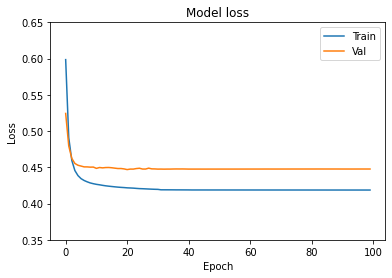

In [108]:
# Plot loss & accuracy of 1st Functional API model

plt.plot(history_f1.history['loss'])
plt.plot(history_f1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim((0.35, 0.65))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

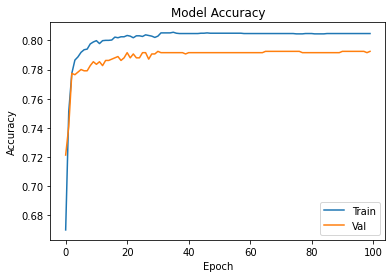

In [109]:
plt.plot(history_f1.history['accuracy'])
plt.plot(history_f1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 1st functional API mode indicates loss to lower value along epochs between train and valid set with stagnant gradient, however their loss line are still apart around 0,030 points. While, model accuracy between train and valid set initially looks slightly volatile uptrending until epochs 40, then becomes constant to the end with discrepancy around 0,010 points.

#### Build 2nd Functional API Model

*Building with several shared nodes and skipping one of steps and with different layering dense and some variation of number of neurons for each layers, then merged into 1 nodes and layering with 1 dense*

In [110]:
inputs = Input(shape=(30,)) 
dense_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
dropout_1 = Dropout(0.3)(dense_1)
dense_4 = Dense(256, activation='relu')(inputs)
dense_5 = Dense(128, activation='relu')(dense_4)
concat_1 = concatenate([dropout_1, dense_5])
dense_6 = Dense(64, activation='relu')(concat_1)
dense_7 = Dense(32, activation='relu')(dense_6)
dense_8 = Dense(32, activation='relu')(dense_7)
dense_9 = Dense(32, activation='relu')(dense_8)
concat_2 = concatenate([concat_1, dense_9])
dense_10 = Dense(32, activation='relu')(concat_2)
outputs = Dense(1, activation='sigmoid')(dense_10)
model_f2 = Model(inputs=inputs, outputs=outputs)

*Changing optimizer to 'adam' refers to Adam, loss function 'binary_crossentropy' since expected output is 1 class between 1 or 2, and metrics 'accuracy' for monitoring in model learning*

In [111]:
# Compile 2nd Functional API model

model_f2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Using input pipeline train_dataset for training and valid_dataset for validation, with 100 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [112]:
# Train 2nd Functional API model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_f2 = model_f2.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 0.7866 - accuracy: 0.7872 - val_loss: 0.6546 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.8008 - val_loss: 0.5265 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8054 - val_loss: 0.4810 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8057 - val_loss: 0.4637 - val_accuracy: 0.7916 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8030 - val_loss: 0.4525 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8092 - val_loss: 0.4463 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4

Epoch 53/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8680 - val_loss: 0.7088 - val_accuracy: 0.7631 - lr: 1.0000e-04
Epoch 54/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8671 - val_loss: 0.7179 - val_accuracy: 0.7614 - lr: 1.0000e-04
Epoch 55/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8682 - val_loss: 0.7268 - val_accuracy: 0.7587 - lr: 1.0000e-04
Epoch 56/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8713 - val_loss: 0.7349 - val_accuracy: 0.7605 - lr: 1.0000e-04
Epoch 57/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8715 - val_loss: 0.7435 - val_accuracy: 0.7605 - lr: 1.0000e-04
Epoch 58/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8727 - val_loss: 0.7522 - val_accuracy: 0.7578 - lr: 1.0000e-04
Epoch 59/100
71/71 [==========================

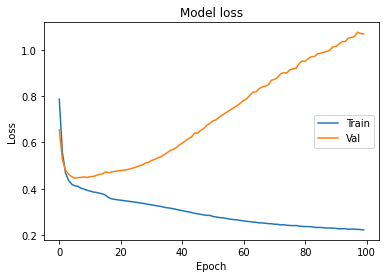

In [113]:
# Plot loss & accuracy of 1st Functional API model

plt.plot(history_f2.history['loss'])
plt.plot(history_f2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='right')
plt.show()

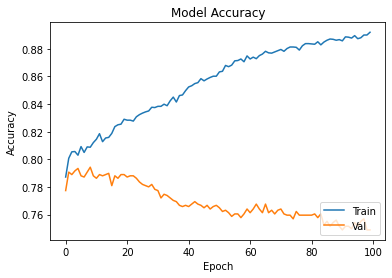

In [114]:
plt.plot(history_f2.history['accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 2nd functional API model indicates both loss and accuracy are divergent. Learning curve in train set in function loss significantly decreases into 0,20 meanwhile in valid test surprisingly increases > 1,0. This divergence also happens in model accuracy's learning curve. It is a clear sign in which this model tends to overfitting.

#### Best Model for Functional API

After training 2 different functional API model, we evaluate each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss & accuracy can be nominated as best model among the others. 

**1st Functional API model** is selected as best model because its loss function value is quite good (around 0,45) and  its degree of discrepancy 0,03 points for loss and 0,010 for accuracy between train and valid set.

## viii. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### Model Evaluation in Train Set between Sequential API Model vs Functional API Model

In [115]:
# Predict y in train set by using Selected Sequential API Model and Functional API Model

y_pred_train_seqt = model_s5.predict(X_train_final)
y_pred_train_func = model_f1.predict(X_train_final)

141/141 [==============================] - 0s 507us/step


In [116]:
# Convert y_pred (still in probablity number) into class 1,0 or class 0 using numpy

y_pred_train_seqt = np.where(y_pred_train_seqt > 0.5, 1, 0)
y_pred_train_func = np.where(y_pred_train_func > 0.5, 1, 0)

In [117]:
print('Classification Report in Train Set on Sequential API model:\n', classification_report(y_train, y_pred_train_seqt))
print('Classification Report in Train Set on Functional API model:\n', classification_report(y_train, y_pred_train_func))

Classification Report in Train Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3308
           1       0.66      0.53      0.59      1184

    accuracy                           0.80      4492
   macro avg       0.75      0.72      0.73      4492
weighted avg       0.80      0.80      0.80      4492

Classification Report in Train Set on Functional API model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3308
           1       0.66      0.54      0.59      1184

    accuracy                           0.80      4492
   macro avg       0.75      0.72      0.73      4492
weighted avg       0.80      0.80      0.80      4492



Based on evaluation metrics above, it can be seen that both neural network's model (Sequential API & Functional API) result bad recall score in Class 1 due to imbalanced dataset.

The context of this model evaluation is to look for metrics how much the amount of teleco customer's data that can be predicted correctly as class = 1 (telecommunication costumer who is churned) from the total class = 1. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error predicted as class = 0, however it turns out to be class = 1.

Based on the classification report, both Sequential API & Functional API give the result of value of *recall* in the class `Is_Churned` = 1 in poor score (only 0,53 & 0,54 respectively). It means the model has not been able to capture the class `Is_Churned` = 1 properly at its prediction. Moreover, the f1-score in Class=0 and Class=1 is apart 0,28 points.

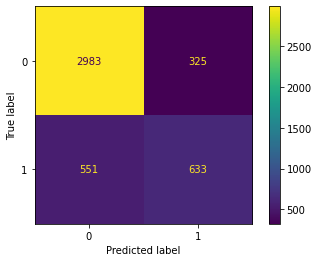

In [118]:
# Evaluate using confusion_matrix in Train Set from Sequential API Model

cmtrs = confusion_matrix(y_train, y_pred_train_seqt)
distrs = ConfusionMatrixDisplay(confusion_matrix=cmtrs)

distrs.plot()
plt.show()

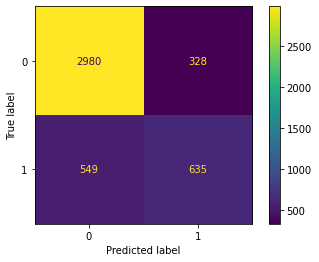

In [119]:
# Evaluate using confusion_matrix in Train Set from Functional API Model

cmtrf = confusion_matrix(y_train, y_pred_train_func)
distrf = ConfusionMatrixDisplay(confusion_matrix=cmtrf)

distrf.plot()
plt.show()

To simply illustrate the meaning of those evaluation metrics above, we can interpret by using the confusion metrics. In Sequential API model, there are 633 customers who are correctly predicted as churned and 551 customers are misclassified (being predicted as not churned but supposedly as churned). While, in functional API model, there are 635 customers who are correctly predicted as churned and 549 customers are misclassified (being predicted as not churned but supposedly as churned). 

141/141 [==============================] - 0s 514us/step


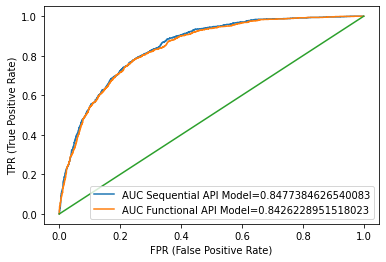

In [120]:
# Plot ROC/AUC score based on y predict_proba on test set from Sequential API Model and Functional API Model

y_prob_train_seqt = model_s5.predict(X_train_final)
fprs, tprs, _ = roc_curve(y_train, y_prob_train_seqt)
aucs = roc_auc_score(y_train, y_prob_train_seqt)

y_prob_train_func = model_f1.predict(X_train_final)
fprf, tprf, _ = roc_curve(y_train, y_prob_train_func)
aucf = roc_auc_score(y_train, y_prob_train_func)

# Plot visualization of ROC/AUC on test set from Sequential API Model and Functional API Model

plt.plot(fprs, tprs, label=f"AUC Sequential API Model={aucs}")
plt.plot(fprf, tprf, label=f"AUC Functional API Model={aucf}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Another metrics that can be used for evaluation is AUC Score, a degree of model's ability to differentiate between Churned Customer (Class = 1) and Stayed Customer (Class = 0). Both models indicate quite good results in AUC score (0,84).

#### Model Evaluation in Test Set between Sequential API Model vs Functional API Model

In [121]:
# Predict y in train set by using Selected Sequential API Model and Functional API Model

y_pred_test_seqt = model_s5.predict(X_test_final)
y_pred_test_func = model_f1.predict(X_test_final)

44/44 [==============================] - 0s 558us/step


In [122]:
# Convert y_pred (still in probablity number) into class 1,0 or class 0 using numpy

y_pred_test_seqt = np.where(y_pred_test_seqt > 0.5, 1, 0)
y_pred_test_func = np.where(y_pred_test_func > 0.5, 1, 0)

In [123]:
print('Classification Report in Test Set on Sequential API model:\n', classification_report(y_test, y_pred_test_seqt))
print('Classification Report in Test Set on Functional API model:\n', classification_report(y_test, y_pred_test_func))

Classification Report in Test Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       367

    accuracy                           0.80      1402
   macro avg       0.74      0.70      0.72      1402
weighted avg       0.79      0.80      0.79      1402

Classification Report in Test Set on Functional API model:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.50      0.56       367

    accuracy                           0.79      1402
   macro avg       0.73      0.70      0.71      1402
weighted avg       0.78      0.79      0.78      1402



Based on the classification report, both Sequential API & Functional API give the result of value of *recall* in the class `Is_Churned` = 1 in poor score (only 0,51 & 0,50 respectively). It means the model has not been able to capture the class `Is_Churned` = 1 properly at its prediction. Moreover, the f1-score in Class=0 and Class=1 is apart 0,30 points.

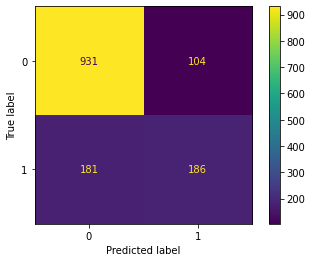

In [124]:
# Evaluate using confusion_matrix in Test Set from Sequential API Model

cmtes = confusion_matrix(y_test, y_pred_test_seqt)
distes = ConfusionMatrixDisplay(confusion_matrix=cmtes)

distes.plot()
plt.show()

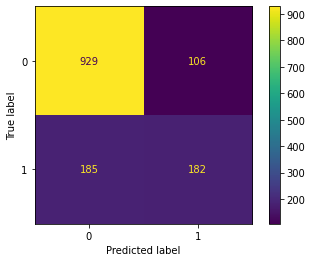

In [125]:
# Evaluate using confusion_matrix in Test Set from Sequential API Model

cmtef = confusion_matrix(y_test, y_pred_test_func)
distef = ConfusionMatrixDisplay(confusion_matrix=cmtef)

distef.plot()
plt.show()

In Sequential API model, there are 186 customers who are correctly predicted as churned and 181 customers are misclassified (being predicted as not churned but supposedly as churned). While, in functional API model, there are 182 customers who are correctly predicted as churned and 185 customers are misclassified (being predicted as not churned but supposedly as churned).

44/44 [==============================] - 0s 535us/step


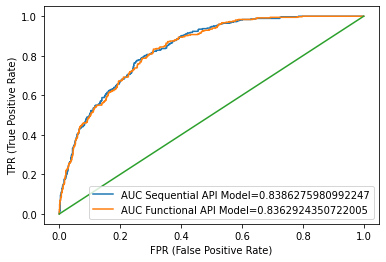

In [126]:
# Plot ROC/AUC score based on y predict_proba on test set from Sequential API Model and Functional API Model

y_prob_test_seqt = model_s5.predict(X_test_final)
fpres, tpres, _ = roc_curve(y_test, y_prob_test_seqt)
auces = roc_auc_score(y_test, y_prob_test_seqt)

y_prob_test_func = model_f1.predict(X_test_final)
fpref, tpref, _ = roc_curve(y_test, y_prob_test_func)
aucef = roc_auc_score(y_test, y_prob_test_func)

# Plot visualization of ROC/AUC on test set from Sequential API Model and Functional API Model

plt.plot(fpres, tpres, label=f"AUC Sequential API Model={auces}")
plt.plot(fpref, tpref, label=f"AUC Functional API Model={aucef}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Another metrics that can be used for evaluation is AUC Score, a degree of model's ability to differentiate between Churned Customer (Class = 1) and Stayed Customer (Class = 0). Both models indicate quite good results in AUC score (0,83), not so far from train set result.

### Manipulation with SMOTENC for Model Improvement 

Based on previous explanations regarding model evaluations using various metrics tools, we can conclude that both Sequential API model and Functional API model are not good enough to learn from Class = 1 (Churned Customers) since dataset proportion is imbalanced, where minority class is only 36% from total dataset. Hence, we need to manipulate those imbalanced dataset with SMOTENC (a smote resampling technic for dataset that consist of numerical and categorical features). Afterwards, the models will be retrained, able to get better learning & training process in minority class. Moreover, the models are expectedly improved.

#### Resampling from Train Set

In [145]:
# Recheck selected features after preprocessing done

X_train.columns

Index(['Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [146]:
# Oversampling on minority class by using SMOTENC in train set 

smotenc = SMOTENC([0, 2, 3, 4, 5, 6, 7, 8, 9], sampling_strategy='minority', random_state=25, k_neighbors=15, n_jobs=-1)
X_train_oversample, y_train_oversample = smotenc.fit_resample(X_train, y_train)
y_train_oversample.value_counts()

Is_Churned
0             3308
1             3308
dtype: int64

In [130]:
# Fit and transform oversampled train set using column transformer

X_train_oversample_final = prep_pipeline.fit_transform(X_train_oversample)

#### Model Retraining with Balanced Train Set

In [131]:
# Create a training Dataset pipelines, slice and shuffle train dataset.

oversampled_dataset = tf.data.Dataset.from_tensor_slices((X_train_oversample_final, y_train_oversample)).shuffle(buffer_size=128, seed=25).batch(64)

In [132]:
# Clone model prior retrain with oversampled train set

model_s5_oversample = clone_model(model_s5)
model_f1_oversample = clone_model(model_f1)

In [133]:
# Compile and Train New Sequential API model

model_s5_oversample.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_s5_oversample = model_s5_oversample.fit(oversampled_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
104/104 [==============================] - 1s 3ms/step - loss: 1.9538 - accuracy: 0.8206 - val_loss: 4.5303 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 1.0869 - accuracy: 0.7441 - val_loss: 0.9921 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 3/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7811 - val_loss: 1.1906 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 4/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7845 - val_loss: 0.9929 - val_accuracy: 0.5476 - lr: 0.0010
Epoch 5/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7920 - val_loss: 1.0229 - val_accuracy: 0.5245 - lr: 0.0010
Epoch 6/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7878 - val_loss: 0.9630 - val_accuracy: 0.5459 - lr: 0.0010
Epoch 7/100
104/104 [==============================] - 0s 2ms/st

104/104 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7956 - val_loss: 0.8337 - val_accuracy: 0.5904 - lr: 0.0010
Epoch 54/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7932 - val_loss: 0.8464 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 55/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7932 - val_loss: 0.8352 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 56/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7982 - val_loss: 0.8190 - val_accuracy: 0.5975 - lr: 0.0010
Epoch 57/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7943 - val_loss: 0.8269 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 58/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7947 - val_loss: 0.8188 - val_accuracy: 0.6002 - lr: 0.0010
Epoch 59/100
104/104 [==============================] - 0s 2ms/step - l

In [134]:
# Compile and Train New Functional API model

model_f1_oversample.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
history_f1_oversample = model_f1_oversample.fit(oversampled_dataset, epochs=100, validation_data=valid_dataset, callbacks=[reduce_lr])

Epoch 1/100
104/104 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8183 - val_loss: 2.0819 - val_accuracy: 0.3366 - lr: 0.0010
Epoch 2/100
104/104 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7781 - val_loss: 1.0112 - val_accuracy: 0.5637 - lr: 0.0010
Epoch 3/100
104/104 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7950 - val_loss: 0.8182 - val_accuracy: 0.6340 - lr: 0.0010
Epoch 4/100
104/104 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7967 - val_loss: 0.7184 - val_accuracy: 0.6652 - lr: 0.0010
Epoch 5/100
104/104 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8020 - val_loss: 0.6809 - val_accuracy: 0.6776 - lr: 0.0010
Epoch 6/100
104/104 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8053 - val_loss: 0.6577 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 7/100
104/104 [==============================] - 0s 1ms/st

104/104 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8490 - val_loss: 0.5769 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 54/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8492 - val_loss: 0.5790 - val_accuracy: 0.7444 - lr: 0.0010
Epoch 55/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8490 - val_loss: 0.5718 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 56/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8501 - val_loss: 0.5779 - val_accuracy: 0.7462 - lr: 0.0010
Epoch 57/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8492 - val_loss: 0.5717 - val_accuracy: 0.7480 - lr: 0.0010
Epoch 58/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8499 - val_loss: 0.5734 - val_accuracy: 0.7480 - lr: 0.0010
Epoch 59/100
104/104 [==============================] - 0s 1ms/step - l

#### Model Evaluation in Balanced Train Set 

In [147]:
# Predict y in oversampled train set after manipulating with SMOTENC

y_pred_train_oversample_seqt = model_s5_oversample.predict(X_train_oversample_final)
y_pred_train_oversample_func = model_f1_oversample.predict(X_train_oversample_final)

207/207 [==============================] - 0s 516us/step


In [148]:
# Convert y_pred (still in probablity number) into class 1,0 or class 0 using numpy

y_pred_train_oversample_seqt = np.where(y_pred_train_oversample_seqt > 0.5, 1, 0)
y_pred_train_oversample_func = np.where(y_pred_train_oversample_func > 0.5, 1, 0)

In [149]:
print('Classification Report in Train Set on Sequential API model:\n', classification_report(y_train, y_pred_train_seqt))
print('Classification Report in Oversampled Train Set on Sequential API model:\n', classification_report(y_train_oversample, y_pred_train_oversample_seqt))

Classification Report in Train Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3308
           1       0.66      0.53      0.59      1184

    accuracy                           0.80      4492
   macro avg       0.75      0.72      0.73      4492
weighted avg       0.80      0.80      0.80      4492

Classification Report in Oversampled Train Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      3308
           1       0.78      0.86      0.82      3308

    accuracy                           0.81      6616
   macro avg       0.82      0.81      0.81      6616
weighted avg       0.82      0.81      0.81      6616



After performing oversamling process in imblanaced dataset by using SMOTENC, it can be seen that the result of evaluation metrics in recall score and f1-score are improved a lot in Sequential API model. There is increment in recall score in class = 1 (Churned Customer) from 0,53 to 0,86 (+0,33 points from imbalanced train set). The discrepancy of f1-score between Class = 1 and Class = 0 is quite close (0,02 points).

207/207 [==============================] - 0s 519us/step


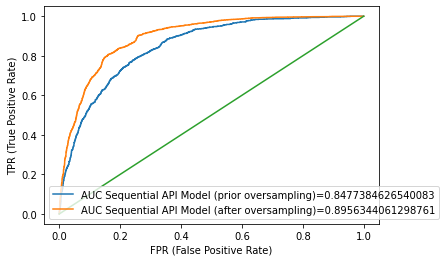

In [143]:
# Plot ROC/AUC score based on y predict_proba on test set from Sequential API Model

y_prob_train_seqt = model_s5.predict(X_train_final)
fprs, tprs, _ = roc_curve(y_train, y_prob_train_seqt)
aucs = roc_auc_score(y_train, y_prob_train_seqt)

y_prob_train_oversample = model_s5_oversample.predict(X_train_oversample_final)
fprf, tprf, _ = roc_curve(y_train_oversample, y_prob_train_oversample)
aucf = roc_auc_score(y_train_oversample, y_prob_train_oversample)

# Plot visualization of ROC/AUC on test set from Sequential API Model and Functional API Model

plt.plot(fprs, tprs, label=f"AUC Sequential API Model (prior oversampling)={aucs}")
plt.plot(fprf, tprf, label=f"AUC Sequential API Model (after oversampling)={aucf}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Besides, AUC Score also improves from 0,84 (imbalanced train set) to 0,89 (balanced train set) in Sequential API models.

In [141]:
print('Classification Report in Train Set on Functional API model:\n', classification_report(y_train, y_pred_train_func))
print('Classification Report in Oversampled Train Set on Functional API model:\n', classification_report(y_train_oversample, y_pred_train_oversample_func))

Classification Report in Train Set on Functional API model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3308
           1       0.66      0.54      0.59      1184

    accuracy                           0.80      4492
   macro avg       0.75      0.72      0.73      4492
weighted avg       0.80      0.80      0.80      4492

Classification Report in Oversampled Train Set on Functional API model:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      3308
           1       0.84      0.88      0.86      3308

    accuracy                           0.86      6616
   macro avg       0.86      0.86      0.86      6616
weighted avg       0.86      0.86      0.86      6616



After performing oversamling process in imblanaced dataset by using SMOTENC, it can be seen that the result of evaluation metrics in recall score and f1-score are improved a lot in Functional API model. There is increment in recall score in class = 1 (Churned Customer) from 0,54 to 0,88 (+0,34 points from imbalanced train set). The discrepancy of f1-score between Class = 1 and Class = 0 is same (86,0).

207/207 [==============================] - 0s 490us/step


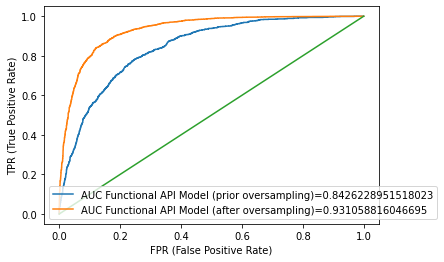

In [144]:
# Plot ROC/AUC score based on y predict_proba on test set from Functional API Model

y_prob_train_func = model_f1.predict(X_train_final)
fprs, tprs, _ = roc_curve(y_train, y_prob_train_func)
aucs = roc_auc_score(y_train, y_prob_train_func)

y_prob_train_oversample = model_f1_oversample.predict(X_train_oversample_final)
fprf, tprf, _ = roc_curve(y_train_oversample, y_prob_train_oversample)
aucf = roc_auc_score(y_train_oversample, y_prob_train_oversample)

# Plot visualization of ROC/AUC on test set from Sequential API Model and Functional API Model

plt.plot(fprs, tprs, label=f"AUC Functional API Model (prior oversampling)={aucs}")
plt.plot(fprf, tprf, label=f"AUC Functional API Model (after oversampling)={aucf}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Besides, AUC Score also improves from 0,84 (imbalanced train set) to 0,93 (balanced train set) in Functional API models.

## ix. Model Saving

> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [150]:
model_f1_oversample.trainable = False
model_f1_oversample.save('churned_customer')

INFO:tensorflow:Assets written to: churned_customer\assets


## x. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Saving

In [156]:
# Save pickle and lists for model inference 

import joblib
import json

with open('prep_pipeline.pkl', 'wb') as file_1:
  joblib.dump(prep_pipeline, file_1)

with open('num_columns.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('cat_columns.txt', 'w') as file_3:
  json.dump(cat_columns, file_3)

with open('norm_columns.txt', 'w') as file_4:
  json.dump(norm_columns, file_4)

with open('skew_columns.txt', 'w') as file_5:
  json.dump(skew_columns, file_5)

with open('enc_columns.txt', 'w') as file_6:
  json.dump(enc_columns, file_6)

model_f1_oversample.save('model_f1_oversample.h5')

### Model Loading

In [157]:
# Load pickle and lists for model inference 

with open('prep_pipeline.pkl', 'rb') as file_1:
  prep_pipeline = joblib.load(file_1)

with open('num_columns.txt', 'r') as file_2:
  num_columns = json.load(file_2)

with open('norm_columns.txt', 'r') as file_3:
  norm_columns = json.load(file_3)

with open('skew_columns.txt', 'r') as file_4:
  skew_columns = json.load(file_4)

with open('cat_columns.txt', 'r') as file_5:
  cat_columns = json.load(file_5)

with open('enc_columns.txt', 'r') as file_6:
  enc_columns = json.load(file_6)

model = tf.keras.models.load_model('model_f1_oversample.h5')

In [158]:
# Preview Inference Set

data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Is_Churned
0,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,Male,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,Female,No,No,No,6,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,Female,No,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,Female,No,Yes,No,19,Yes,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,Female,No,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,Female,No,No,No,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


### Inferencing

In [162]:
# Feature Scaling and Feature Encoding

data_inf_prep = prep_pipeline.transform(data_inf)

In [163]:
# Predict inference set using model

data_inf_pred = model.predict(data_inf_prep)
data_inf_pred = np.where(data_inf_pred > 0.5, 1, 0)

1/1 [==============================] - 0s 48ms/step


In [165]:
# Convert into dataframe

data_inf_pred_df = pd.DataFrame(data_inf_pred, columns=['prediction_by_neural_networks'])
data_inf_pred_df

,prediction_by_neural_networks
0,1
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [166]:
# Concate between Inference-Set and Prediction's result

data_inf = pd.concat([data_inf, data_inf_pred_df], axis=1)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Is_Churned,prediction_by_neural_networks
0,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0,1
1,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0,1
2,Male,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0,0
3,Female,No,No,No,6,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1,1
4,Female,No,No,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1,0
5,Female,No,Yes,No,19,Yes,No,DSL,No,Yes,...,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0,0
6,Female,No,Yes,Yes,8,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0,0
7,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,No,...,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0,0
8,Male,No,No,No,8,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1,1
9,Female,No,No,No,19,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0,0


## xi. Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

#### Recap of EDA

- Based on heatmap correlation above between numerical columns to target, it can be seen that those features represented as `tenure`, `MonthlyCharges`, and `TotalCharges` have adequate correlation values to target `Is_Churned` from ±0,19 to ±0,35.
- Based on histogram graphs above, it can be seen that most of `tenure`'s numbers are dominantly in 0-5 times and around 70 times with at least 800 total nos. Both `MonthlyCharges` and `TotalCharges` are dominated by low charges, ~20 USD and 0-500 USD respectively. The distribution of `tenure` and `MonthlyCharges` are categorized as normal distribution, while `TotalCharges`'s has rightly skewed distribtution.
- Based on query and aggregation above, it can be seen that there is unique charateristic which can be concluded from average number of `tenure`'s as follows: customer who tends to be churned is having lower tenure than customer who stays. Therefor, this feature can be considerably having adequate relationship with target `Is_Churned`.
- Based on query and aggregation above, it can be seen that there are unique charateristic between `MonthlyCharges` and `TotalCharges` which can be concluded from their average charges as follows: customer who tends to be churned is having higher charges in monthly basis yet lower charges in total compared to customer who stays. Therefor, these features can be considerably having adequate relationship with target `Is_Churned`.
- Based on countplot graphs above, it can be seen that there is no particular charactheristic in `gender`'s feature. Both target's class show same proportional number in Male and Female. There is unique characteristics in `Partner` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of `Partner`'s values. On other hands, both `SeniorCitizen` and `Dependents` are no indicating unique characteristic in term of proportional ratio's way. They are presenting same typical proportions for each values in every target's classes. Therefor, only `Partner` can be considerably having adequate relationship with target `Is_Churned`.
- Based on countplot graphs above, it can be seen that there are no particular charactheristics in features of `PhoneService`, `OnlineSecurity` and `TechSupport`. Both target's class show same typical proportions for each values in every target's classes. On the contrary, there are unique characteristics in `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of mentioned features's values in every target's classes. Customer who signed up for internet service for fiber optics tends to get churned higher than other internet's services. In aspect of streaming TV & movies, customer who did not sign up for these services tends to get churned higher than who signed up for. In aspect of online backup & device protection, customer who did not sign up for these services tends to get churned higher than who signed up for. Therefor, `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` can be considerably having adequate relationships with target `Is_Churned`.
- Based on countplot graphs above, it can be seen that there is no particular charactheristics in features of `PaperlessBilling`. Target's class show same typical proportions for each values in every target's classes.
- On the contrary, there are unique characteristics in `Contract`, and `PaymentMethod` referred to countplot graph. Customer who tends to be churned has different typical proportional ratio compared to customer who stays in term of mentioned features's values in every target's classes. Customer who is commited his contract by month-to-month basis tends to get churned higher than yearly basis. In aspect of payment method, customer who use electronic check as his method for payment tends to get churned higher than any other types of payment. Therefor, `Contract`, and `PaymentMethod` can be considerably having adequate relationships with target `Is_Churned`.

#### Recap of Preprocessing

- 15 rows of dataset is dedicated for inference dataset. Then, the remaining of datasets are splitted into trainval set (80%) and test set (20%). After that, trainval set is splitted into train set (80%) and valid set (20%).
- Handling missing value is performed in features `TotalCharges`, where its missingness is MCAR and below 5% from total, CCA (dropping rows) is performed.
- No handling outliers is performed.
- Create columntransformer `prep_pipeline` for feature scaling and feature encoding, then fit_transform in train set and transform in valid set and test set

#### Recap of Features Selection

Based on analysis in Explatory Data Analysis for both numerical and categorical features, there are some features which have adequate correlations to classification label in `Is_Churned`. Justification of selection basically relies on evaluation of heatmap correlation, countplot visualization's characteristics, and grouping & aggregating of features. The feature selection result are as follows:
- *Numerical*
    - `tenure` : average value of `tenure` in class `Is_Churned` = 1 lower than class `Is_Churned` = 0.
    - `MonthlyCharges` : average value of `MonthlyCharges` in class `Is_Churned` = 1 higher than class `Is_Churned` = 0.
    - `TotalCharges` : average value of `TotalCharges` in class `Is_Churned` = 1 lower than class `Is_Churned` = 0.
- *Categorical*
    - `Partner` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `Partner`.
    - `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `MultipleLines`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `StreamingTV`, and `StreamingMovies`.
    - `Contract`, and `PaymentMethod` : proportional numbers in class `Is_Churned` = 1 is having different typical pattern of proportions compared to class `Is_Churned` = 0, in which specified values in `Contract`, and `PaymentMethod`.

#### Model Definition, Model Training, and Model Selection

In this case, an objectives which is expected to be performed is a deep learning (Neural Network) model that able to predict classification of `Is_Churned` from telecommunication customer's churn dataset. Hence, there are two types of neural network which will be trained and evaluated as follows:

1. **Sequential API** 
2. **Functional API**

**Sequential API** 
After training 6 different sequential API model, we evaluate each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss & accuracy can be nominated as best model among the others. **5th Sequential API model** is selected as best model because its loss function value is quite good (around 0,45) and  its degree of discrepancy 0,02 points for loss and 0,001 for accuracy between train and valid set.

**Functional API**
After training 2 different functional API model, we evaluate each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss & accuracy can be nominated as best model among the others. **1st Functional API model** is selected as best model because its loss function value is quite good (around 0,45) and  its degree of discrepancy 0,03 points for loss and 0,010 for accuracy between train and valid set.

#### Model Evaluation and Model Improvement

**Train Set**
- Based on evaluation metrics above, it can be seen that both neural network's model (Sequential API & Functional API) result bad recall score in Class 1 due to imbalanced dataset.
- The context of this model evaluation is to look for metrics how much the amount of teleco customer's data that can be predicted correctly as class = 1 (telecommunication costumer who is churned) from the total class = 1. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error predicted as class = 0, however it turns out to be class = 1.
- Based on the classification report, both Sequential API & Functional API give the result of value of *recall* in the class `Is_Churned` = 1 in poor score (only 0,53 & 0,54 respectively). It means the model has not been able to capture the class `Is_Churned` = 1 properly at its prediction. Moreover, the f1-score in Class=0 and Class=1 is apart 0,28 points.
- To simply illustrate the meaning of those evaluation metrics above, we can interpret by using the confusion metrics. In Sequential API model, there are 633 customers who are correctly predicted as churned and 551 customers are misclassified (being predicted as not churned but supposedly as churned). While, in functional API model, there are 635 customers who are correctly predicted as churned and 549 customers are misclassified (being predicted as not churned but supposedly as churned). 
- Another metrics that can be used for evaluation is AUC Score, a degree of model's ability to differentiate between Churned Customer (Class = 1) and Stayed Customer (Class = 0). Both models indicate quite good results in AUC score (0,84).

**Test Set**
- Based on the classification report, both Sequential API & Functional API give the result of value of *recall* in the class `Is_Churned` = 1 in poor score (only 0,51 & 0,50 respectively). It means the model has not been able to capture the class `Is_Churned` = 1 properly at its prediction. Moreover, the f1-score in Class=0 and Class=1 is apart 0,30 points.
- In Sequential API model, there are 186 customers who are correctly predicted as churned and 181 customers are misclassified (being predicted as not churned but supposedly as churned). While, in functional API model, there are 182 customers who are correctly predicted as churned and 185 customers are misclassified (being predicted as not churned but supposedly as churned).
- Another metrics that can be used for evaluation is AUC Score, a degree of model's ability to differentiate between Churned Customer (Class = 1) and Stayed Customer (Class = 0). Both models indicate quite good results in AUC score (0,83), not so far from train set result.

**Model Improvement**
- Based on previous explanations regarding model evaluations using various metrics tools, we can conclude that both Sequential API model and Functional API model are not good enough to learn from Class = 1 (Churned Customers) since dataset proportion is imbalanced, where minority class is only 36% from total dataset. Hence, we need to manipulate those imbalanced dataset with SMOTENC (a smote resampling technic for dataset that consist of numerical and categorical features). Afterwards, the models will be retrained, able to get better learning & training process in minority class. Moreover, the models are expectedly improved.
- After performing oversamling process in imblanaced dataset by using SMOTENC, it can be seen that the result of evaluation metrics in recall score and f1-score are improved a lot in Sequential API model. There is increment in recall score in class = 1 (Churned Customer) from 0,53 to 0,86 (+0,33 points from imbalanced train set). The discrepancy of f1-score between Class = 1 and Class = 0 is quite close (0,02 points).
- Besides, AUC Score also improves from 0,84 (imbalanced train set) to 0,89 (balanced train set) in Sequential API models.
- After performing oversamling process in imblanaced dataset by using SMOTENC, it can be seen that the result of evaluation metrics in recall score and f1-score are improved a lot in Functional API model. There is increment in recall score in class = 1 (Churned Customer) from 0,54 to 0,88 (+0,34 points from imbalanced train set). The discrepancy of f1-score between Class = 1 and Class = 0 is same (86,0).
- Besides, AUC Score also improves from 0,84 (imbalanced train set) to 0,93 (balanced train set) in Functional API models.

**Best Model**
- Improved Function API model which retrained with balanced train set is defined as best model `model_f1_oversample` with best recall score, good fit based on f1-score between Class=1 and Class=0, and AUC-Score = 0,93.

#### For Further Improvement

- In this notebook, we only train 2 different type of Functional API model, it would be better if we try more various schemes for functional API model, that may get better result

### **Thank you! Any feedback is very appreciated**